# Regression and Visualisation
## Learning Goals

- Learn to fit regression model in Python
- Learn to visualise your results

### Import packages and data
In this example, we use an inbuilt dataset "diabetes" in the sklearn package.
For more information regarding the features (the $X$) and the target (the $y$), please refer to the sklearn documentation: 

https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset

The sklearn pacakge offers a basket of simple and efficient tools for data mining and machine learning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
print('# of observations (N) and # of each observation\'s attributes (p) are',diabetes.data.shape)
print('# of responses (N) is',diabetes.target.shape)

# of observations (N) and # of each observation's attributes (p) are (442, 10)
# of responses (N) is (442,)


### Visualise the data

There are 10 attributes in the data set. To visualize the relationship, we draw a scatter plot for each attribute `x` against the dependent variable `y` (a quantitative measure of disease progression one year after baseline).

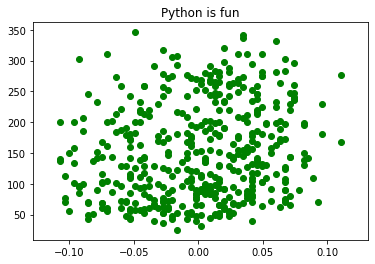

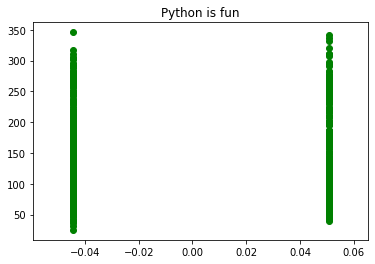

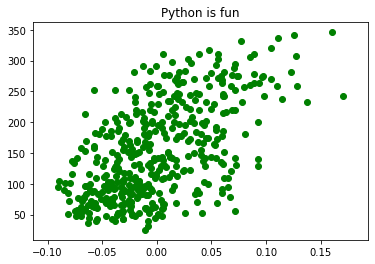

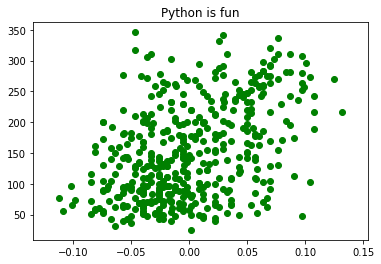

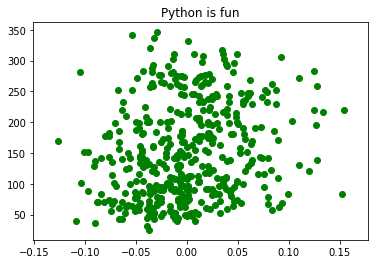

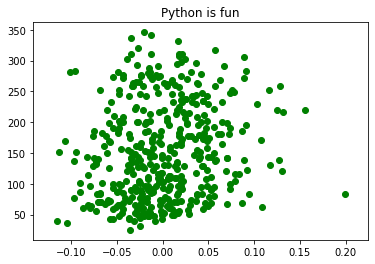

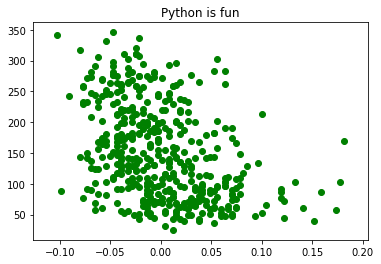

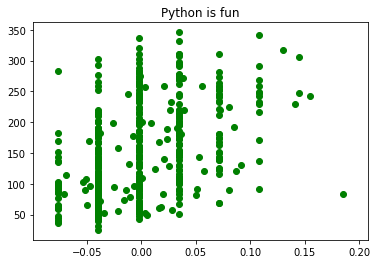

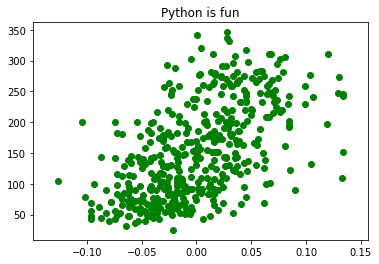

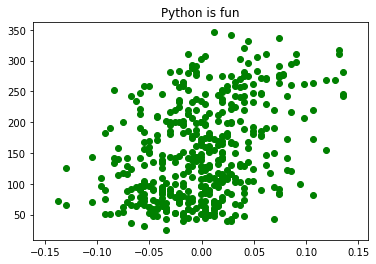

In [4]:
column_names = ['Age','Sex','Body mass index','Average blood pressure','S1','S2','S3','S4','S5','S6']
y = diabetes.target
X = diabetes.data
for i in range(10):
    x = X[:,i]
    plt.scatter(x,y, color = 'g')
    plt.title(column_names[i])
    plt.show()

### Splitting the data set into training and testing data

Using the function `train_test_split`, we split our data set so that $10\%$ data is in the testing set and $90\%$ data is in the training set.

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

### Sklearn Linear Regression

We have imported the `LinearRegression` class in the code above. Now we need to create an object of that class, which is the linear regression model. 

Then we will use the fit method to 'fit' the model to our dataset, i.e. we make the regressor study our data and learn from it.

In [6]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Most of the time we are interested in the coefficients and the intercept of the model.

In [7]:
print ('Coefficients of the model:',lr.coef_)
print ('Intercept of the model:',lr.intercept_)

Coefficients of the model: [ -13.49834619 -219.54962286  538.10926539  323.53280172 -861.8534588
  541.11605566  133.13062282  166.42562085  783.5424578    76.38974608]
Intercept of the model: 151.8207805032595


### Least Squares analytical solution

Since least squares estimation has a nice analytical form, we can verify our findings.

Stack a column of ones in our training $X$ and call it matrix $A$, then we can apply the formula $\hat{\beta} = A^{\dagger} y$

In [8]:
A = np.column_stack([np.ones(len(x_train)), x_train])
LS_coef = np.linalg.pinv(A)@y_train
print (LS_coef)

[ 151.8207805   -13.49834619 -219.54962286  538.10926539  323.53280172
 -861.8534588   541.11605566  133.13062282  166.42562085  783.5424578
   76.38974608]


Now that we have trained our model, we can test the model with our testing dataset. We will create predictions $\hat{y}$ using $X$ in the testing data and compare the prediction $\hat{y}$ to the $y$ in the testing data. 

In [9]:
y_hat = lr.predict(x_test)

# Calaulate the RMS, given observed value y and estimated value y_hat
def RMSE(y,y_hat):
    return np.linalg.norm(y-y_hat)/len(y)**0.5

print ("Testing Error: ", RMSE(y_test,y_hat))
print ("Training Error: ", RMSE(y_train, lr.predict(x_train)))

Testing Error:  46.03466486916226
Training Error:  54.278721129950156


### Statistical Inferences

We can also obtain the details regarding statistical significance of our model using the package `statsmodels`.

The statsmodel is a Python package providing tools for the estimation of many different statistical models, as well as for conducting statistical tests. The online documentation is hosted at www.statsmodels.org


In [10]:
import statsmodels.api as sm
X2 = sm.add_constant(x_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     40.13
Date:                Thu, 14 Nov 2019   Prob (F-statistic):           7.57e-54
Time:                        14:49:26   Log-Likelihood:                -2149.0
No. Observations:                 397   AIC:                             4320.
Df Residuals:                     386   BIC:                             4364.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        151.8208      2.767     54.866      0.0

## More on plots

We will now demonstrate more on plots using another famous dataset: Iris data set.

https://scikit-learn.org/stable/datasets/index.html#iris-dataset

In [11]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
Y = iris.target
column_names = ['sepal length','sepal width','petal length','petal width']
print (X.shape)
print (Y.shape)

(150, 4)
(150,)


#### Scatter plots
Let's do a scatter plot on the sepal width against the sepal length. To give the graph more meaning, we can color each data point by its class. This can be done by creating a dictionary which maps from class to color and then scattering each point on its own using a for-loop and passing the respective color.

Text(0, 0.5, 'sepal_width')

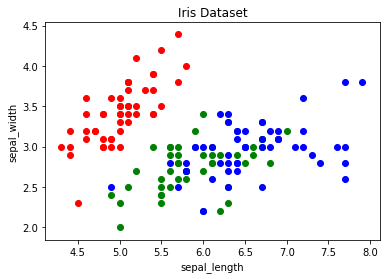

In [12]:
# create color dictionary
colors = {0:'r',1:'g',2:'b'}
# plot each data-point
for i in range(len(Y)):
    plt.scatter(X[i][0], X[i][1], color=colors[Y[i]])
# set a title and labels
plt.title('Iris Dataset')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

#### Histogram
In matplotlib we can create a histogram using the `hist` method.

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

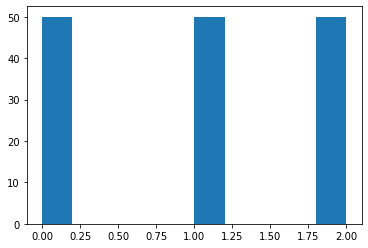

In [13]:
plt.hist(Y)

(array([38., 80., 68., 62., 50., 41., 38., 42., 17.,  6.]),
 array([ 25. ,  57.1,  89.2, 121.3, 153.4, 185.5, 217.6, 249.7, 281.8,
        313.9, 346. ]),
 <a list of 10 Patch objects>)

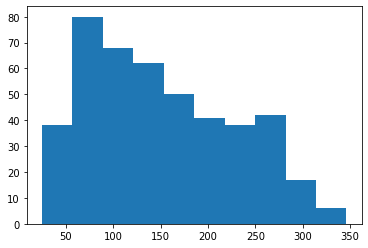

In [14]:
plt.hist(diabetes.target)

To compute multiple graphs, we can use `subplots`.

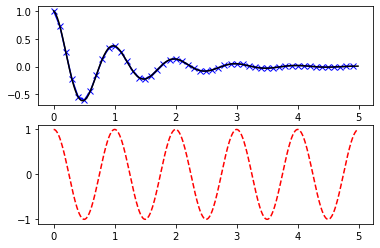

In [17]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.01)

plt.subplot(211)
plt.plot(t1, f(t1), color='blue', marker='x')
plt.plot(t2, f(t2), color='black')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), color='red', linestyle='--')
plt.show()

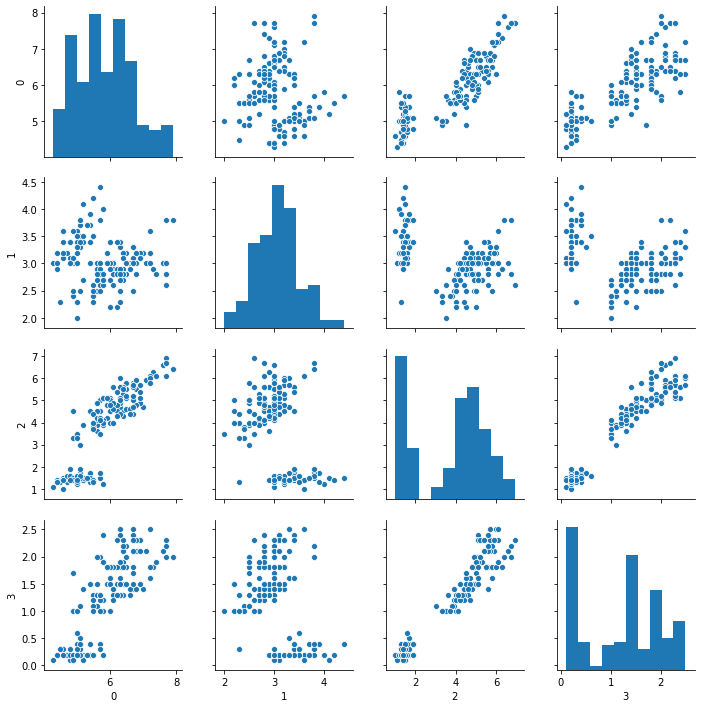

In [19]:
import seaborn as sns
X = pd.DataFrame(X)
sns.pairplot(X)